In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import pandas as pd
import numpy as np

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

from plot import get_price_duration


In [12]:
inelastic_files = {k: f"../../results/20240426-fixed-years/network_solved_LT-country+DE-fixed_year+{k}-inelastic+true.nc" for k in range(1951, 2021)}
ns_inelastic = {k: pypsa.Network(v) for k, v in inelastic_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1951-inelastic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1952-inelastic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1953-inelastic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1954-inelastic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1955-inelastic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1956-inelastic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1957-inelastic+true.nc has buses, carrier

In [5]:
voll_files = {k: f"../../results/20240426-fixed-years/network_solved_LT-country+DE-fixed_year+{k}-voll+true.nc" for k in range(1951, 2021)}
ns_voll = {k: pypsa.Network(v) for k, v in voll_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1951-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1952-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1953-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1954-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1955-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1956-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1957-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT

In [6]:
pwl_files = {k: f"../../results/20240426-fixed-years/network_solved_LT-country+DE-fixed_year+{k}-elastic_pwl+default.nc" for k in range(1951, 2021)}
ns_pwl = {k: pypsa.Network(v) for k, v in pwl_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1951-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1952-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1953-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1954-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1955-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1956-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-fixed_year+1957-elasti

In [13]:
pdc_inelastic = {k: get_price_duration(v) for k, v in ns_inelastic.items()}
pdc_voll = {k: get_price_duration(v) for k, v in ns_voll.items()}
pdc_pwl = {k: get_price_duration(v) for k, v in ns_pwl.items()}

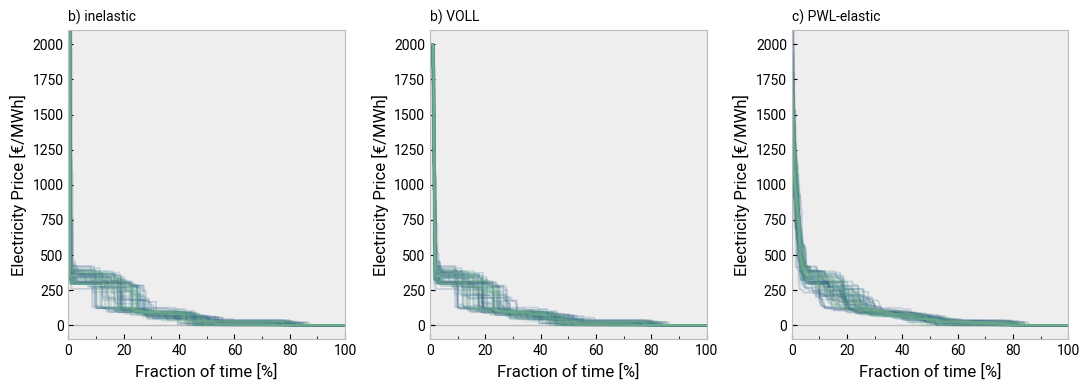

In [28]:
colors = sns.color_palette("crest", 10)
lw = 1.25

fig, axs = plt.subplots(1, 3, figsize=(11, 4))

for year, pdc in pdc_inelastic.items():
    decade = int(str(year)[2])
    pdc.plot(ax=axs[0], linewidth=lw, color=colors[decade], alpha=0.2)

for year, pdc in pdc_voll.items():
    decade = int(str(year)[2])
    pdc.plot(ax=axs[1], linewidth=lw, color=colors[decade], alpha=0.2)

for year, pdc in pdc_pwl.items():
    decade = int(str(year)[2])
    pdc.plot(ax=axs[2], linewidth=lw, color=colors[decade], alpha=0.2)

axs[0].set_title("b) inelastic", loc='left', fontsize='medium')
axs[1].set_title("b) VOLL", loc='left', fontsize='medium')
axs[2].set_title("c) PWL-elastic", loc='left', fontsize='medium')

for i in range(3):

    axs[i].set_ylim(-100, 2100)
    axs[i].set_ylabel("Electricity Price [€/MWh]")
    axs[i].set_yticks(range(0, 2001, 250), minor=True)
    axs[i].set_xticks(range(0, 101, 20))
    axs[i].set_xticks(range(0, 101, 10), minor=True)
    axs[i].set_xlabel("Fraction of time [%]")
    axs[i].axhline(0, linewidth=1, color='#bbb', zorder=0)
    axs[i].set_xlim(0, 100)

plt.tight_layout()

for ext in ["png", "pdf"]:
    plt.savefig(f"../../resources/figure-single-pdc.{ext}", bbox_inches='tight')

In [18]:
int(str(year)[2])

2